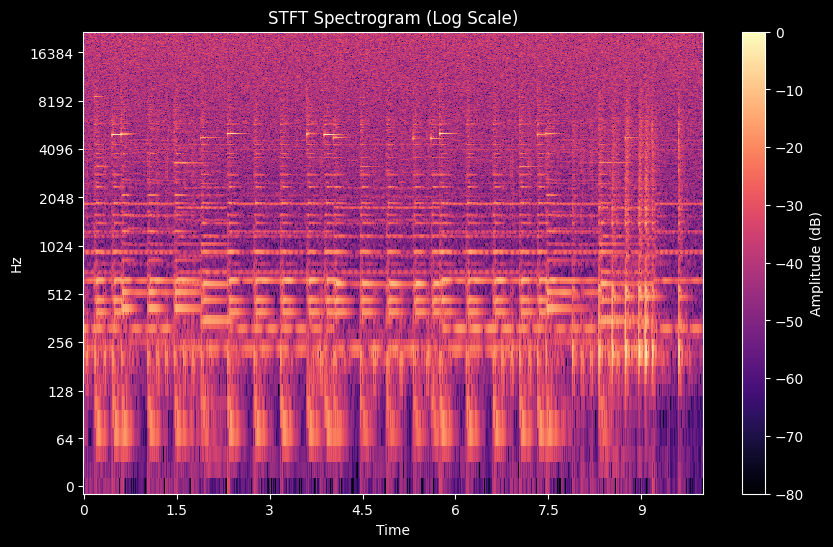

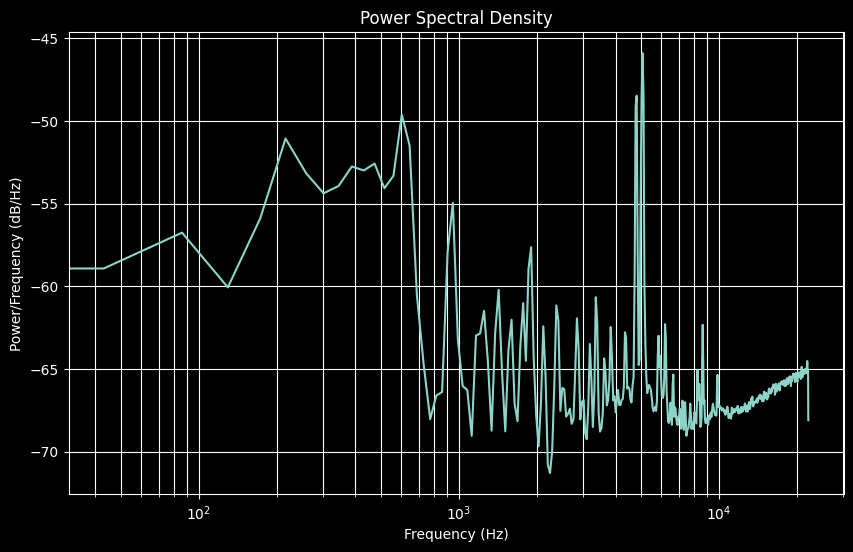

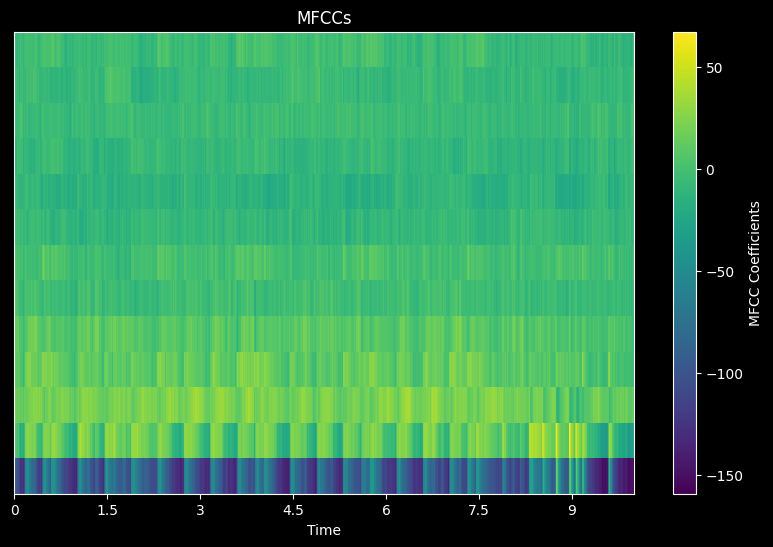

'Unknown'

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import welch
import librosa.display

def classify_noise(file_path):
    # Load audio
    y, sr = librosa.load(file_path, sr=None)
    
    # Normalize the audio signal
    y = y / np.max(np.abs(y))
    
    # Compute Short-Time Fourier Transform (STFT)
    stft = librosa.stft(y, n_fft=2048, hop_length=512)
    stft_magnitude = np.abs(stft)
    stft_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)
    
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    # Compute Power Spectral Density (PSD)
    freqs, psd = welch(y, fs=sr, nperseg=1024)
    
    # Log-log scale for linear fitting
    log_freqs = np.log10(freqs[1:])  # Skip 0 Hz to avoid log(0)
    log_psd = np.log10(psd[1:])
    
    # Linear regression to find the slope
    slope, _ = np.polyfit(log_freqs, log_psd, 1)
    
    # Classification based on slope
    if -0.1 <= slope <= 0.1:
        noise_type = "White Noise"
    elif -1.2 < slope <= -0.8:
        noise_type = "Pink Noise"
    elif slope < -1.2:
        noise_type = "Brownian Noise"
    elif 0.2 <= slope < 1.0:
        noise_type = "Blue Noise"
    elif slope >= 1.0:
        noise_type = "Violet Noise"
    elif 0.1 < slope < 0.2:
        noise_type = "Grey Noise"
    elif -0.2 <= slope < -0.1:
        noise_type = "Velvet Noise" 
    else:
        noise_type = "Unknown"
    
    # Visualize STFT spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(stft_db, sr=sr, hop_length=512, x_axis="time", y_axis="log", cmap="magma")
    plt.title("STFT Spectrogram (Log Scale)")
    plt.colorbar(label="Amplitude (dB)")
    plt.show()
    
    # Visualize PSD
    plt.figure(figsize=(10, 6))
    plt.semilogx(freqs, 10 * np.log10(psd), label="PSD (dB/Hz)")
    plt.title("Power Spectral Density")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power/Frequency (dB/Hz)")
    plt.grid(True, which="both")
    plt.show()
    
    # Visualize MFCCs
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="viridis")
    plt.title("MFCCs")
    plt.colorbar(label="MFCC Coefficients")
    plt.show()
    
    return noise_type

classify_noise(
    "/home/dhruv/Programming/CollegeProjects/Sem5/DAA/Audio-background-noise-cancellation/data/noiseGeneration/noiseSamples/noised/noisy_blue_audio_2.wav"
)

